<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E7%B7%B4%E7%BF%92%EF%BC%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# CSVファイルを読み込み
df = pd.read_csv('/content/Boston.csv')

df['CRIME'].value_counts()

# ダミー変数への変換
crime = pd.get_dummies(df['CRIME'], prefix='crime', drop_first=True)

# 元のデータフレームとダミー変数を横方向に連結
df2 = pd.concat([df, crime], axis=1)

df2 = df2.drop(['CRIME'], axis = 1)


# 連結結果の表示
df2.head(2)




,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,crime_low,crime_very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [ ]:
train_val, test = train_test_split(df2,test_size = 0.2,random_state = 0)

In [ ]:
# 欠損値の調査
missing_values = train_val.isnull().sum()
print("欠損値の数:\n", missing_values)

欠損値の数:
 ZN                0
INDUS             0
CHAS              0
NOX               1
RM                0
AGE               0
DIS               0
RAD               0
TAX               0
PTRATIO           0
B                 0
LSTAT             0
PRICE             0
crime_low         0
crime_very_low    0
dtype: int64


In [ ]:
# 欠損値を平均値で補完
train_val2 = train_val.fillna(train_val.mean(numeric_only=True))


In [ ]:
train_val2.columns

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE', 'crime_low', 'crime_very_low'],
      dtype='object')

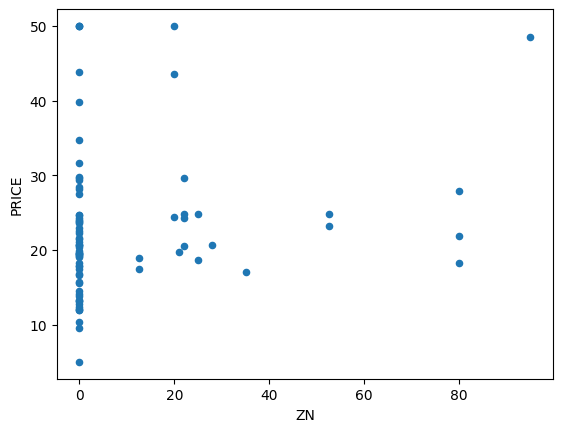

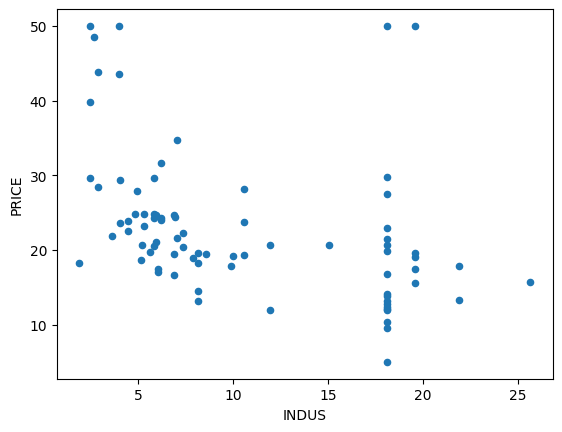

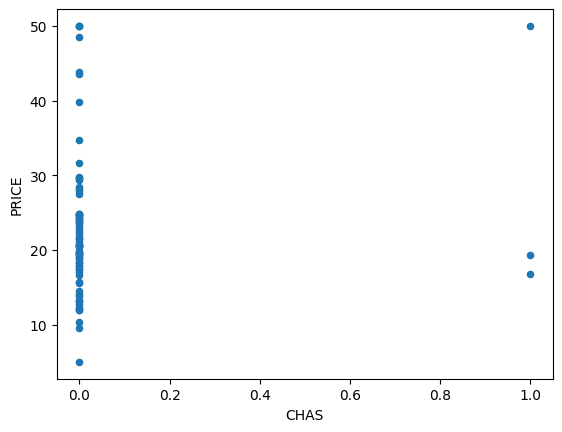

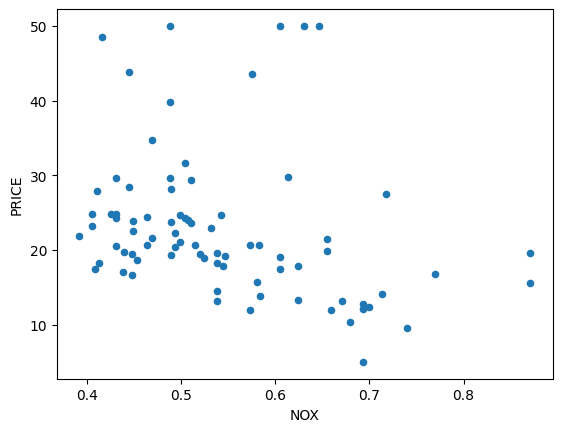

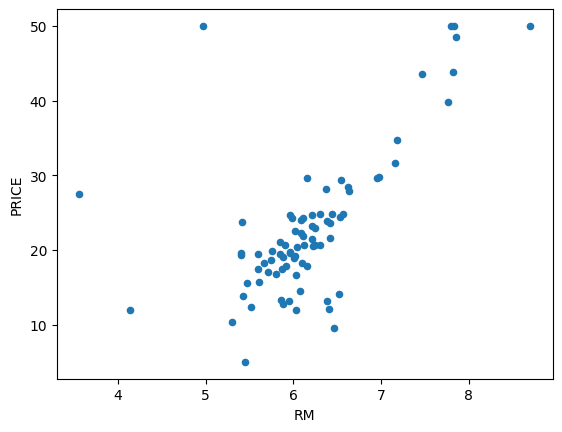

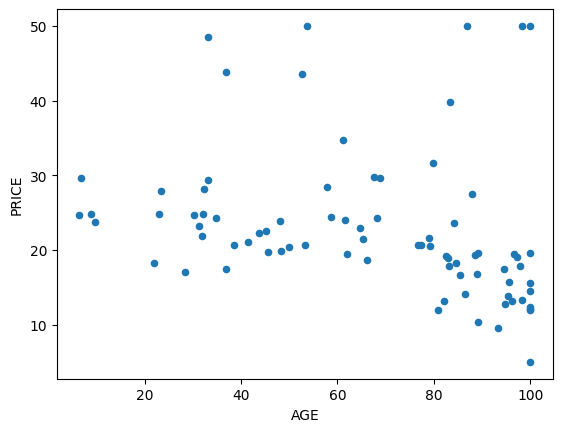

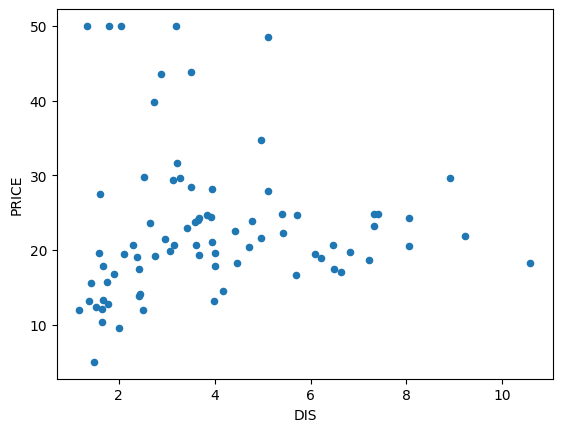

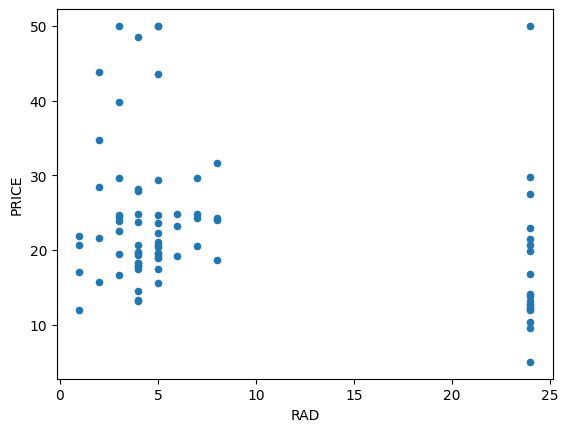

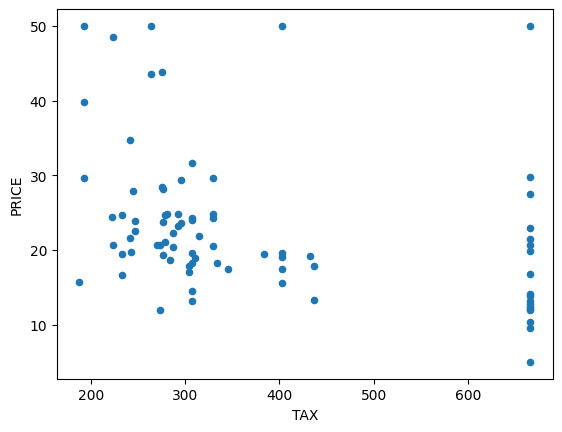

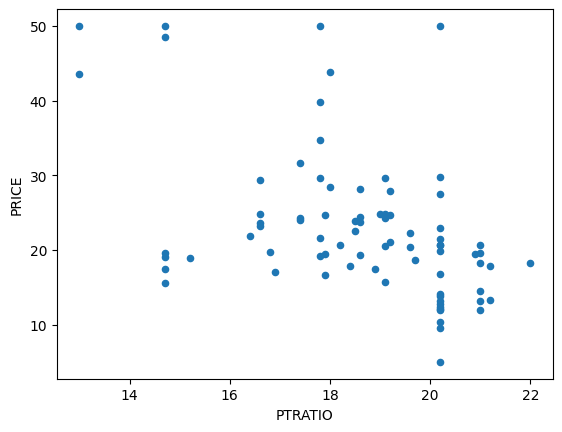

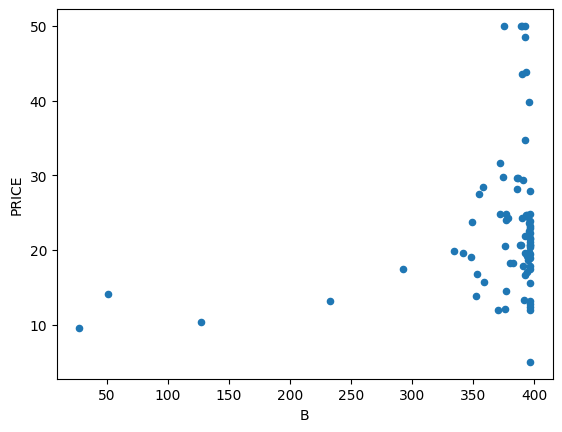

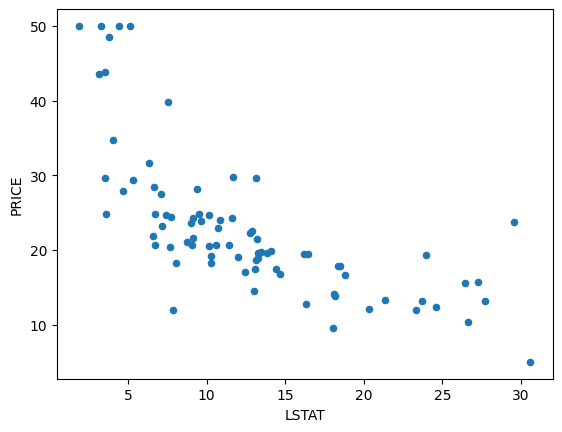

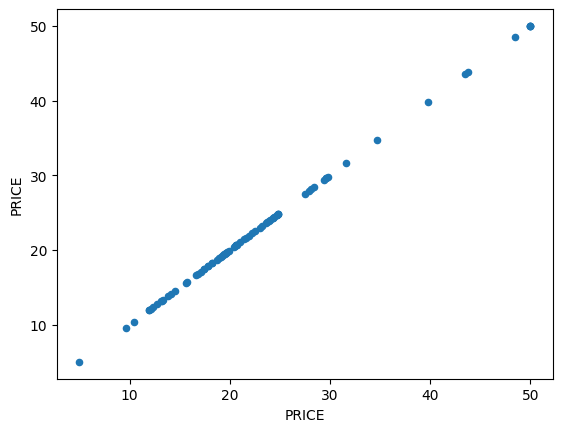

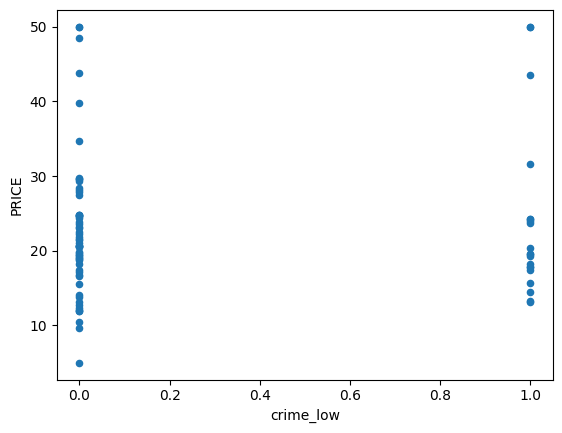

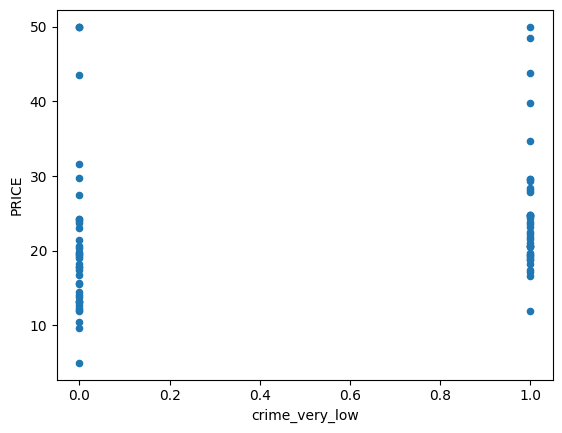

In [ ]:
import matplotlib.pyplot as plt

colname = train_val2.columns

for name in  colname:

    train_val2.plot(kind='scatter', x=name, y='PRICE')

    plt.show()

In [ ]:
# 外れ値データを作成
no = train_val2[(train_val2['RM'] < 6) & (train_val2['PRICE'] > 40)].index

no2 = train_val2[(train_val2['PTRATIO'] > 20) & (train_val2['PRICE'] > 40)].index


print(no,no2)

Int64Index([76], dtype='int64') Int64Index([76], dtype='int64')


In [ ]:
#外れ値を削除
train_val3 = train_val2.drop([76],axis=0)

In [ ]:
col = ['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT', 'PRICE']

train_val4 = train_val3[col]
train_val4.head(3)

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
43,5.86,0.431,6.108,19.1,9.16,24.3
62,5.86,0.431,6.957,19.1,3.53,29.6
3,21.89,0.624,6.151,21.2,18.46,17.8


In [ ]:
train_val4.corr()

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
INDUS,1.000000,0.785722,-0.403129,0.249438,0.578406,-0.470889
NOX,0.785722,1.000000,-0.272996,0.077533,0.484295,-0.325289
RM,-0.403129,-0.272996,1.000000,-0.404568,-0.560454,0.753771
PTRATIO,0.249438,0.077533,-0.404568,1.000000,0.326563,-0.542449
LSTAT,0.578406,0.484295,-0.560454,0.326563,1.000000,-0.693490
PRICE,-0.470889,-0.325289,0.753771,-0.542449,-0.693490,1.000000


In [ ]:
# 相関係数の計算
train_col = train_val4.corr()['PRICE']

# 相関係数を表示
print(train_col)

INDUS     -0.470889
NOX       -0.325289
RM         0.753771
PTRATIO   -0.542449
LSTAT     -0.693490
PRICE      1.000000
Name: PRICE, dtype: float64


In [ ]:
# 相関係数を絶対値に変換
abs_train_col = train_col.abs()

# 降順に並び替え
sorted_train_col = abs_train_col.sort_values(ascending=False)

# 結果を表示
print(sorted_train_col)

PRICE      1.000000
RM         0.753771
LSTAT      0.693490
PTRATIO    0.542449
INDUS      0.470889
NOX        0.325289
Name: PRICE, dtype: float64


In [ ]:
col = ['RM','LSTAT','PTRATIO']

X = train_val4[col]
y = train_val4[['PRICE']]
#標準化のため　yもリストで指定する

# 訓練データと検証データの分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
from sklearn.preprocessing import StandardScaler

# 特徴量の標準化
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

#正解データも標準化
scaler2 = StandardScaler()
scaler2.fit(y_train)

y_train_scaled = scaler2.transform(y_train)
y_val_scaled = scaler2.transform(y_val)



1.0

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()